## (E7) Which_celebrity_do_you_look_like?_InYu
## Step1. 사진 모으기

준비
```
$ pip install cmake
$ pip install dlib
$ pip install face_recognition --user
```
  

1.내 사진 찍기  
내 사진을 3장 준비했다. 안경 쓴 사진2장과 안경을 쓰지 않은 1장이다.  
이 사진들끼리의 얼굴 임베딩 벡터 거리를 구해 보자.  

2.비교할 연예인 사진 모으기  
안경을 쓴 사진과 안경을 쓰지 않은 내 얼굴 사진까지 총 3장의 이미지를 포함시켰다.  
또한 변호윤 퍼실(SSAC)님이 제공한 celebrity 사진들을 사용했다.  
  


In [15]:
import face_recognition
import os
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def get_gropped_face(image_file):
    excepted_list = []
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    
    if len(face_locations) == 0 :
        return excepted_list
    
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face

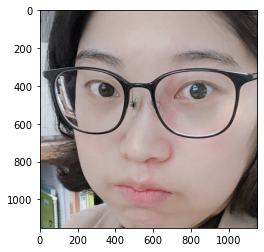

In [17]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/인유1.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

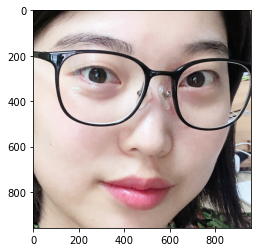

In [19]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/인유2.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

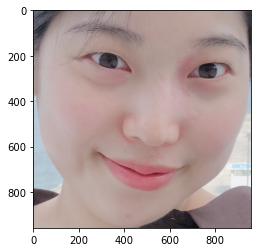

In [18]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/인유3.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

와.. 부담스럽다.. 어쩌지..

In [20]:
# 이 사진들끼리의 얼굴 임베딩 벡터 거리를 구해 보자.
import numpy as np

A = embedding_dict['인유1']
B = embedding_dict['인유2']
C = embedding_dict['인유3']

In [23]:
distances = np.linalg.norm([A, B] - C, axis=1, ord=2)
print("Distance between A and C: {}".format(distances[0]))
print("Distance between B and C: {}".format(distances[1]))
distances = np.linalg.norm([A] - B, axis=1, ord=2)
print("Distance between A and B: {}".format(distances[0])) 

Distance between A and C: 0.37567498561735857
Distance between B and C: 0.3274768629348746
Distance between A and B: 0.3145366173573683


In [27]:
# 위의 3장의 사진의 임베딩 거리의 벡터 평균 
print(round((0.3757+0.3275+0.3145)/3, 4))

0.3392


## Step2. 얼굴 영역 자르기    
임베딩 추출을 위해서는 얼굴 영역을 잘라줘야 한다. 위 Step1.에서 찾은 이미지들을 get_gropped_face(image_file) 함수를 통해서 자른다.   



자른 이미지는 PIL의 Image.fromarray를 통해서 PIL Image로 변환한 뒤에 저장을 해두면 다양한 재미있는 시각화를 시도해 보는 데 도움이 될 것입니다.  
```
#    힌트
#    from PIL import Image
#    face = get_gropped_face(image_path)
#    pillow_image = Image.fromarray(face)
#    pillow_image.save(path_to_save)
```  


 len(face_locations) == 0 일 경우, get_cropped_face  함수가 빈 배열을 return 하도록 한다

이미지 파일 경로를 파라미터로 넘기면 얼굴 영역만 잘라서 뿌려주는 함수를 하나 만들어

In [28]:
import face_recognition
import os
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


def get_gropped_face(image_file):
    excepted_list = []
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    
    if len(face_locations) == 0 :
        return excepted_list
    
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face

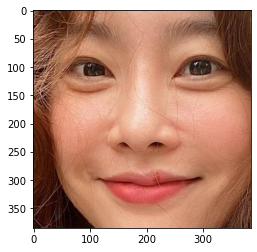

In [3]:
# 얼굴 영역에 맞게 잘 잘리나 확인하기
image_path = os.getenv('HOME')+'/aiffel/face_embedding/selected/소진2.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

## Step3. 얼굴 영역의 임베딩 추출하기
이제 얼굴 영역으로 잘린 이미지들이 여럿 생겼을 텐데요. 그 이미지를 face_recognition 을 사용해서 이미지를 불러오고 임베딩을 추출해 봅시다.   다른 사람의 임베딩은 구분할 수 있게 따로 저장해 주세요. 이전에 만들었던 다음 함수들을 활용하면 손쉽게 수행 가능합니다.  

def get_face_embedding(face) : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수  
def get_face_embedding_dict(dir_path) : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수

In [4]:
# 잘라야 하는 사진들의 list

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity'
file_list = os.listdir(dir_path)

print(len(file_list))
print ("file_list: {}".format(file_list))

280
file_list: ['이민호.jpeg', '조승우.jpeg', 'biden.jpg', '트와이스모모.jpeg', '하승진.jpg', '아놀드 슈워제네거.jpg', '박나래.jpeg', '트와이스쯔위.jpg', '이종석.jpeg', '윤아.jpg', '크리스탈.jpg', '영알남.png', '성룡.jpg', '아이즈원민주.jpg', '이성민.jpg', '이천수.jpg', '잇섭.png', '류준열.jpg', '이광수.jpg', '슈가.jpg', '이명박.jpg', '김학범.jpg', '최준석.jpg', '매드클라운.jpeg', '클린트 이스트우드.jpg', '잭 니콜슨.jpeg', '김희철.jpg', '김영삼.jpeg', '박서준.jpeg', '유해진.jpg', '류승범.jpg', '김윤석.jpeg', '성시경.jpg', '인유1.jpg', '정수빈.jpg', '조달환.png', '이동국.jpeg', '트와이스정연.jpg', '심수창.jpeg', '권태원.jpeg', '지드래곤.jpeg', '개코.jpeg', '이효리.jpg', '크리스 햄스워스.jpg', '방시혁.jpeg', '숀 코네리.jpg', '박희순.jpg', '송중기.jpeg', '박찬욱.jpeg', '노무현.jpeg', '이대형.jpg', 'trump.jpg', '이연걸.jpeg', '돈스파이크.jpg', '제이크 질렌할.jpeg', '우기.jpg', '강미나.jpg', '제프리 힌턴.jpg', '리사.jpg', '하정우.jpg', '배성재.jpg', '솔라.jpg', '마동석.jpeg', '조정석.jpg', '잭 블랙.jpeg', '전지현.jpeg', '백윤식.png', '이경규.jpeg', '김래원.jpeg', '야마다 타카유키.jpeg', '카이.jpg', '정형돈.jpg', '제이홉.jpg', '트와이스사나.jpg', '리아.jpg', '지디.jpg', '권현빈.jpg', '소진2.jpg', '이대호.jpeg', '황병국.jpg', '조정치.jpg', '이재용.jpg', '아이즈원김

In [31]:
# image인 사진을 벡터화 확인하기
image_file = os.path.join(dir_path, '소진2.jpg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
print('임베딩 벡터의 차원은 :', len(embedding[0])) # 차원은 이미 face_recognition 에 설정되어있다.
embedding

임베딩 벡터의 차원은 : 128


[array([-0.08678568,  0.09460756,  0.01507359, -0.10658735, -0.1194548 ,
        -0.04731128, -0.09132218, -0.12160927,  0.16152592, -0.14174806,
         0.17468037, -0.07667062, -0.16645384, -0.06080785, -0.04696331,
         0.22250499, -0.27472493, -0.1411031 , -0.04205049, -0.0175581 ,
         0.06802459,  0.07585631,  0.02148244,  0.05308609, -0.07189701,
        -0.35394275, -0.10198168, -0.08128175,  0.02351913, -0.03877339,
         0.00418512,  0.07328367, -0.16208276, -0.01291248,  0.0448862 ,
         0.13524935, -0.00627583, -0.0939059 ,  0.17698792, -0.02744941,
        -0.26346645,  0.078373  ,  0.08240177,  0.23063944,  0.19085911,
        -0.02286271,  0.02180438, -0.21448924,  0.14384271, -0.10844551,
         0.01712207,  0.13976373,  0.02883598,  0.05978249,  0.06412934,
        -0.11269697,  0.04591948,  0.12830934, -0.11885199, -0.02035981,
         0.13089702, -0.03788813,  0.03141731, -0.15170738,  0.21658051,
         0.03140642, -0.0920581 , -0.24089499,  0.1

In [35]:
# 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file) 
        face = get_gropped_face(img_path)
        if len(face) == 0: 
            continue # 얼굴 인식 실패시 embedding_dict에 추가하지 않음
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

print(len(embedding_dict))
print('성공')

279
성공


In [33]:
# 확인하기 (3분정도 걸림)
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['인유1']

array([-4.49107066e-02,  6.85994551e-02,  7.26788715e-02, -8.06662589e-02,
       -1.47533134e-01, -1.28571875e-04, -1.19998544e-01, -1.15204364e-01,
        9.39192325e-02, -1.76390231e-01,  1.77318379e-01, -4.98885438e-02,
       -2.08712727e-01, -6.74883798e-02, -2.90312320e-02,  1.99335262e-01,
       -1.45008773e-01, -1.82107031e-01,  7.33685680e-04, -5.90107916e-03,
        6.76111951e-02,  1.30852824e-02,  6.47067875e-02,  4.53029424e-02,
       -1.67938203e-01, -3.47102672e-01, -1.15129977e-01, -4.77626920e-02,
       -2.36463100e-02, -5.01365550e-02, -1.04972243e-01,  5.15704639e-02,
       -1.49096608e-01,  2.67483182e-02,  3.51941511e-02,  1.39173344e-01,
        4.54340782e-03, -1.12300612e-01,  1.80185765e-01,  6.06452208e-03,
       -3.09081316e-01,  1.27820754e-02,  7.07548931e-02,  1.95022017e-01,
        1.67897791e-01,  1.28684537e-02,  6.19891062e-02, -1.07491024e-01,
        1.14369713e-01, -1.59196079e-01,  6.52716011e-02,  1.31813556e-01,
        6.34106770e-02,  

## Step4. 모은 연예인들과 비교하기
모은 연예인 사진들과 자신의 얼굴 사진에서 추출한 임베딩 벡터들 간의 거리를 비교해 보고 가장 작은 연예인이 누구인지 찾아보자.  
이전 스텝에서 만들었던 get_nearest_face(name, top=5) 함수들을 응용하면 손쉽게 수행 가능하다. 

In [36]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('인유1') 

In [37]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))[:10]

[('인유1',
  array([-4.49107066e-02,  6.85994551e-02,  7.26788715e-02, -8.06662589e-02,
         -1.47533134e-01, -1.28571875e-04, -1.19998544e-01, -1.15204364e-01,
          9.39192325e-02, -1.76390231e-01,  1.77318379e-01, -4.98885438e-02,
         -2.08712727e-01, -6.74883798e-02, -2.90312320e-02,  1.99335262e-01,
         -1.45008773e-01, -1.82107031e-01,  7.33685680e-04, -5.90107916e-03,
          6.76111951e-02,  1.30852824e-02,  6.47067875e-02,  4.53029424e-02,
         -1.67938203e-01, -3.47102672e-01, -1.15129977e-01, -4.77626920e-02,
         -2.36463100e-02, -5.01365550e-02, -1.04972243e-01,  5.15704639e-02,
         -1.49096608e-01,  2.67483182e-02,  3.51941511e-02,  1.39173344e-01,
          4.54340782e-03, -1.12300612e-01,  1.80185765e-01,  6.06452208e-03,
         -3.09081316e-01,  1.27820754e-02,  7.07548931e-02,  1.95022017e-01,
          1.67897791e-01,  1.28684537e-02,  6.19891062e-02, -1.07491024e-01,
          1.14369713e-01, -1.59196079e-01,  6.52716011e-02,  1.3181

In [38]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [39]:
get_nearest_face('인유1')

순위 1 : 이름(인유2), 거리(0.3145366173573683)
순위 2 : 이름(인유3), 거리(0.37567498561735857)
순위 3 : 이름(하현우), 거리(0.39705618924296077)
순위 4 : 이름(윤아), 거리(0.39870168393360966)
순위 5 : 이름(러블리즈지수), 거리(0.41095645665178965)


In [40]:
get_nearest_face('인유2')

순위 1 : 이름(인유1), 거리(0.3145366173573683)
순위 2 : 이름(인유3), 거리(0.3274768629348746)
순위 3 : 이름(아이유), 거리(0.3918822985358638)
순위 4 : 이름(하현우), 거리(0.4229105554378435)
순위 5 : 이름(아이린), 거리(0.42511853264610633)


In [41]:
get_nearest_face('인유3')

순위 1 : 이름(인유2), 거리(0.3274768629348746)
순위 2 : 이름(아이유), 거리(0.3487912454944288)
순위 3 : 이름(사쿠라), 거리(0.35382463949671406)
순위 4 : 이름(우기), 거리(0.3549802011542485)
순위 5 : 이름(김고은), 거리(0.3594564447970731)


안경을 쓰지 않은 사진에서는 안경을 쓴 '인유1'은 순위 안에도 들지 못했다.  
안경 혹은 얼굴 각도에 따른 오차가 생겼다고 추측해 볼 수 있다.

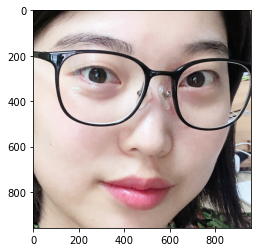

In [94]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/인유2.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

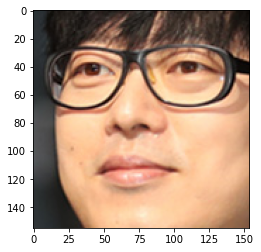

In [95]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/하현우.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

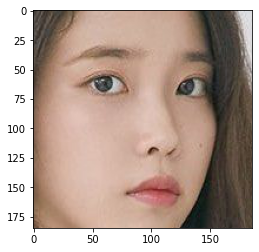

In [97]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/아이유.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

하현우와는 안경이며 볼각도가 비슷해 보인다. 
아이유와는 사진 가도만 비슷해보인다. 

## +얼굴임베딩 사이의 거리측정+

In [42]:
import numpy as np

A = embedding_dict['인유3']
B = embedding_dict['인유2']
C = embedding_dict['강동원']

In [43]:
distances = np.linalg.norm([A, C] - B, axis=1, ord=2)
print("Distance between A and B: {}".format(distances[0]))
print("Distance between C and B: {}".format(distances[1]))

Distance between A and B: 0.3274768629348746
Distance between C and B: 0.6160028874609143


## Step5. 다양한 재미있는 시각화 시도해 보기
비단 닮은 꼴 연예인을 찾기만 할 것이 아니라, 그들의 얼굴 사진을 활용하여 재미있는 시각화를 시도해 보시기 바랍니다.  
tkinter나 flask를 활용해서 닮은꼴을 찾을 이미지를 업로드한 후 그 이미지와 닮은 얼굴을 찾는 형태로 구현해 보는 것도 재미있을 것입니다.  
여러분들의 재치가 넘치는 작품들을 기대합니다. 😎    

### 자매 사진으로 거리재보기

In [89]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/Kims/지인.JPG'

cropped_face = get_gropped_face(image_path)
# plt.imshow(cropped_face)

In [90]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/Kims/인유.JPG'

cropped_face = get_gropped_face(image_path)
# plt.imshow(cropped_face)

In [91]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/Kims/영인.JPG'

cropped_face = get_gropped_face(image_path)
# plt.imshow(cropped_face)

In [92]:
# image인 사진을 벡터화 확인하기
dir_path_Kims = os.getenv('HOME')+'/aiffel/face_embedding/Kims'

image_file = os.path.join(dir_path_Kims, '영인.JPG')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
print('셋째의 임베딩 벡터의 차원은 :', len(embedding[0])) # 차원은 이미 face_recognition 에 설정되어있다.
embedding

셋째의 임베딩 벡터의 차원은 : 128


[array([-0.09030531,  0.06181698,  0.03139742, -0.05694521, -0.11575036,
        -0.02544711, -0.04585985, -0.12078355,  0.14002894, -0.08168975,
         0.22978765, -0.12377954, -0.27962804, -0.02829945, -0.13134611,
         0.24390396, -0.16789898, -0.14702803, -0.0571207 ,  0.04096123,
         0.14407919,  0.02827828,  0.01107822,  0.05492723, -0.09364721,
        -0.31818375, -0.08760867, -0.05914681, -0.02403961, -0.0531963 ,
        -0.01169911,  0.1170723 , -0.18084702, -0.03681101,  0.04207382,
         0.06401458,  0.00593456, -0.08586594,  0.19126347,  0.00943541,
        -0.31339398,  0.05968813,  0.07970724,  0.25413188,  0.14387123,
         0.01957829,  0.02963484, -0.18909651,  0.05050762, -0.20203395,
         0.0007898 ,  0.18437871,  0.03149505,  0.0352879 , -0.0030862 ,
        -0.11584932,  0.05787493,  0.0802093 , -0.1440094 , -0.00113697,
         0.14144951, -0.076819  , -0.02508155, -0.13442177,  0.17357644,
         0.01816208, -0.10928858, -0.18430752,  0.1

In [79]:
# 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수
dir_path_Kims = os.getenv('HOME')+'/aiffel/face_embedding/Kims'

def get_face_embedding_dict_Kims(dir_path_Kims):
    file_list_Kims = os.listdir(dir_path_Kims)
    embedding_dict_Kims = {}

    for file in file_list_Kims:
        img_path_Kims = os.path.join(dir_path_Kims, file) 
        face_Kims = get_gropped_face(img_path_Kims)
        embedding_Kims = get_face_embedding(face_Kims)
        if len(embedding_Kims) > 0:
            embedding_dict_Kims[os.path.splitext(file)[0]] = embedding_Kims[0]
            # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 

    return embedding_dict_Kims

print('성공')

성공


In [82]:
# 확인하기 (3분정도 걸림 왜이죠)
embedding_dict_Kims = get_face_embedding_dict_Kims(dir_path_Kims)
embedding_dict_Kims['영인']

array([-0.09030531,  0.06181698,  0.03139742, -0.05694521, -0.11575036,
       -0.02544711, -0.04585985, -0.12078355,  0.14002894, -0.08168975,
        0.22978765, -0.12377954, -0.27962804, -0.02829945, -0.13134611,
        0.24390396, -0.16789898, -0.14702803, -0.0571207 ,  0.04096123,
        0.14407919,  0.02827828,  0.01107822,  0.05492723, -0.09364721,
       -0.31818375, -0.08760867, -0.05914681, -0.02403961, -0.0531963 ,
       -0.01169911,  0.1170723 , -0.18084702, -0.03681101,  0.04207382,
        0.06401458,  0.00593456, -0.08586594,  0.19126347,  0.00943541,
       -0.31339398,  0.05968813,  0.07970724,  0.25413188,  0.14387123,
        0.01957829,  0.02963484, -0.18909651,  0.05050762, -0.20203395,
        0.0007898 ,  0.18437871,  0.03149505,  0.0352879 , -0.0030862 ,
       -0.11584932,  0.05787493,  0.0802093 , -0.1440094 , -0.00113697,
        0.14144951, -0.076819  , -0.02508155, -0.13442177,  0.17357644,
        0.01816208, -0.10928858, -0.18430752,  0.11431366, -0.13

In [93]:
# 이 사진들끼리의 얼굴 임베딩 벡터 거리를 구해 보자.
import numpy as np

JI = embedding_dict_Kims['지인']
IY = embedding_dict_Kims['인유']
YI = embedding_dict_Kims['영인']

In [88]:
distances = np.linalg.norm([JI, IY] - YI, axis=1, ord=2)
print("Distance between JI and YI: {}".format(distances[0]))
print("Distance between IY and YI: {}".format(distances[1]))
distances = np.linalg.norm([A] - B, axis=1, ord=2)
print("Distance between JI and IY: {}".format(distances[0])) 

Distance between JI and YI: 0.4213482333580324
Distance between IY and YI: 0.39391186235198167
Distance between JI and IY: 0.4450779585885437


둘째와 셋째가 많이 닮고 첫째와 둘째는 별로 안닮았다고 나왔다. 주변에서 자매끼리 비슷하다고 듣는 편인데, 은근히 거리가 차이가 나서 놀랐다.

# 루브릭
1. 얼굴임베딩 벡터를 활용해 가장 닮은 연예인 Best 5를 구할 수 있다.  
->안경을 쓴 사진과 안경을 쓰지 않은 사진까지 따로 Best 5 를 구했다.  
  
2. 충분한 수의 이미지에 대한 시도를 통해 매우 닮은꼴의 연예인을 찾아냈다.  
->생각보다 많은 사진이 0.5가 되지 않아서 놀랐다.  
  
3. 다양하고 재미있는 결과 시각화를 시도하였다.  
->자매끼리의 사진을 통해 거리를 쟀다.  

# 고찰  
이미지를 벡터로 표현하는 과정에서 face_recognition를 사용해서 편리했다.  
구글에서 발표한 FaceNet모델을 탑재한 것인데 L2 Normalization을 거쳐 임베딩을 만들어 내고 여기에 Triplet Loss를 사용한다고 한다. 순차적으로 이해가 가는데도 'Triplet Loss'는 더 이해할 수 있도록 공부가 필요하다고 느꼈다.  